In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
nltk.download('stopwords')

from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


# Data Load

In [ ]:
yelp = pd.read_csv('/content/drive/MyDrive/yelp.csv')
yelp.shape

(10000, 10)

In [ ]:
yelp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   business_id  10000 non-null  object
 1   date         10000 non-null  object
 2   review_id    10000 non-null  object
 3   stars        10000 non-null  int64 
 4   text         10000 non-null  object
 5   type         10000 non-null  object
 6   user_id      10000 non-null  object
 7   cool         10000 non-null  int64 
 8   useful       10000 non-null  int64 
 9   funny        10000 non-null  int64 
dtypes: int64(4), object(6)
memory usage: 781.4+ KB


In [ ]:
yelp.head(5)

,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny
0,9yKzy9PApeiPPOUJEtnvkg,2011-01-26,fWKvX83p0-ka4JS3dc6E5A,5,My wife took me here on my birthday for breakf...,review,rLtl8ZkDX5vH5nAx9C3q5Q,2,5,0
1,ZRJwVLyzEJq1VAihDhYiow,2011-07-27,IjZ33sJrzXqU-0X6U8NwyA,5,I have no idea why some people give bad review...,review,0a2KyEL0d3Yb1V6aivbIuQ,0,0,0
2,6oRAC4uyJCsJl1X0WZpVSA,2012-06-14,IESLBzqUCLdSzSqm0eCSxQ,4,love the gyro plate. Rice is so good and I als...,review,0hT2KtfLiobPvh6cDC8JQg,0,1,0
3,_1QQZuf4zZOyFCvXc0o6Vg,2010-05-27,G-WvGaISbqqaMHlNnByodA,5,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",review,uZetl9T0NcROGOyFfughhg,1,2,0
4,6ozycU1RpktNG2-1BroVtw,2012-01-05,1uJFq2r5QfJG_6ExMRCaGw,5,General Manager Scott Petello is a good egg!!!...,review,vYmM4KTsC8ZfQBg-j5MWkw,0,0,0


In [ ]:
yelp.describe()

,stars,cool,useful,funny
count,10000.000000,10000.000000,10000.000000,10000.000000
mean,3.777500,0.876800,1.409300,0.701300
std,1.214636,2.067861,2.336647,1.907942
min,1.000000,0.000000,0.000000,0.000000
25%,3.000000,0.000000,0.000000,0.000000
50%,4.000000,0.000000,1.000000,0.000000
75%,5.000000,1.000000,2.000000,1.000000
max,5.000000,77.000000,76.000000,57.000000


In [ ]:
# text length에 대한 정보를 새로운 열로 추가!
yelp['text length'] = yelp['text'].apply(len)
yelp.head(5)

,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny,text length
0,9yKzy9PApeiPPOUJEtnvkg,2011-01-26,fWKvX83p0-ka4JS3dc6E5A,5,My wife took me here on my birthday for breakf...,review,rLtl8ZkDX5vH5nAx9C3q5Q,2,5,0,895
1,ZRJwVLyzEJq1VAihDhYiow,2011-07-27,IjZ33sJrzXqU-0X6U8NwyA,5,I have no idea why some people give bad review...,review,0a2KyEL0d3Yb1V6aivbIuQ,0,0,0,1349
2,6oRAC4uyJCsJl1X0WZpVSA,2012-06-14,IESLBzqUCLdSzSqm0eCSxQ,4,love the gyro plate. Rice is so good and I als...,review,0hT2KtfLiobPvh6cDC8JQg,0,1,0,76
3,_1QQZuf4zZOyFCvXc0o6Vg,2010-05-27,G-WvGaISbqqaMHlNnByodA,5,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",review,uZetl9T0NcROGOyFfughhg,1,2,0,423
4,6ozycU1RpktNG2-1BroVtw,2012-01-05,1uJFq2r5QfJG_6ExMRCaGw,5,General Manager Scott Petello is a good egg!!!...,review,vYmM4KTsC8ZfQBg-j5MWkw,0,0,0,471


# Data Visualizing

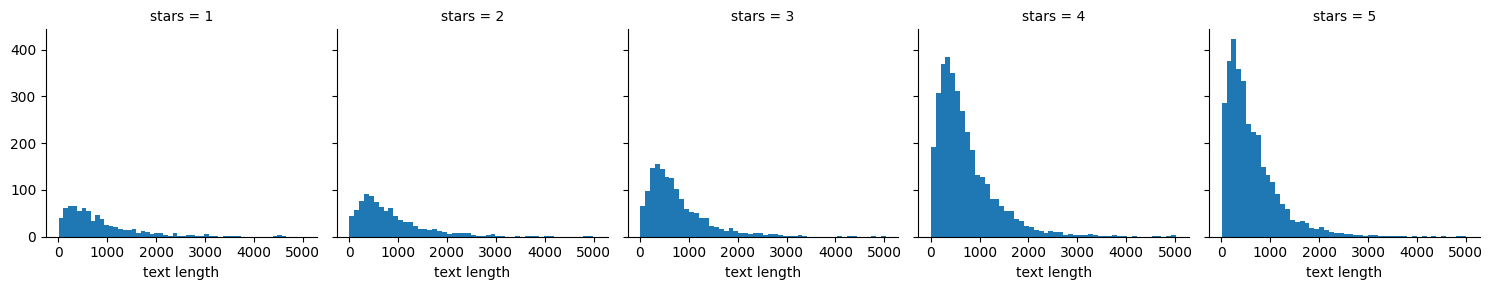

In [ ]:
# 별점에 따른 text length 시각화
g = sns.FacetGrid(data=yelp, col='stars')
g.map(plt.hist, 'text length', bins=50)

<Axes: xlabel='stars', ylabel='text length'>

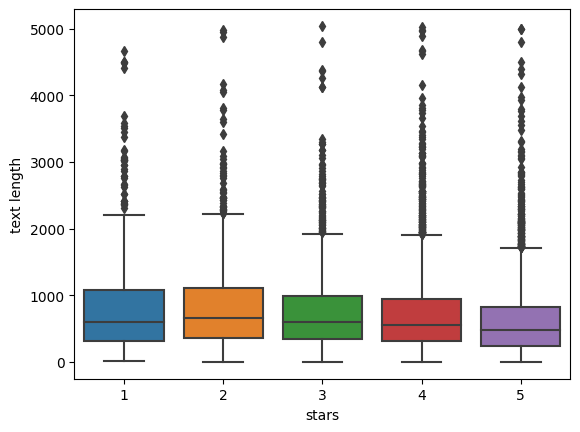

In [ ]:
# 다른 방법으로 시각화
sns.boxplot(x='stars', y='text length', data=yelp)

In [ ]:
stars = yelp.groupby('stars').mean()
stars.corr()

<ipython-input-12-b5c98d2281fd>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  stars = yelp.groupby('stars').mean()


,cool,useful,funny,text length
cool,1.000000,-0.743329,-0.944939,-0.856995
useful,-0.743329,1.000000,0.894506,0.698743
funny,-0.944939,0.894506,1.000000,0.842585
text length,-0.856995,0.698743,0.842585,1.000000


<Axes: >

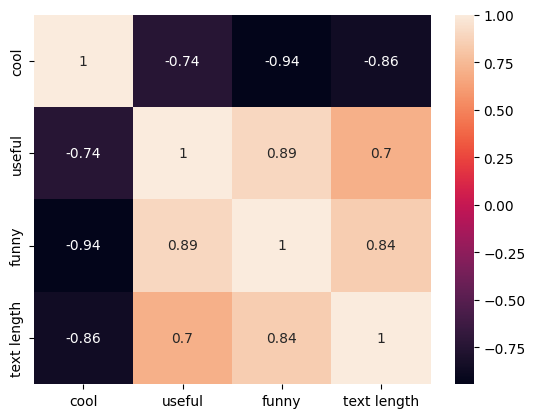

In [ ]:
# heatmap으로 시각화
sns.heatmap(data=stars.corr(), annot=True)

# Data Preprocessing

In [ ]:
# review text를 분석해서 positive or negative를 예측해야하기 때문에
## 별점이 1 or 5인 리뷰만을 선택!
yelp_class = yelp[(yelp['stars'] == 1) | (yelp['stars'] == 5)]
yelp_class.shape

(4086, 11)

In [ ]:
# x: 분석할값,text / y: 예측할값,star
x = yelp_class['text']
y = yelp_class['stars']

In [ ]:
x[0]       # 분석할 review text

'My wife took me here on my birthday for breakfast and it was excellent.  The weather was perfect which made sitting outside overlooking their grounds an absolute pleasure.  Our waitress was excellent and our food arrived quickly on the semi-busy Saturday morning.  It looked like the place fills up pretty quickly so the earlier you get here the better.\r\n\r\nDo yourself a favor and get their Bloody Mary.  It was phenomenal and simply the best I\'ve ever had.  I\'m pretty sure they only use ingredients from their garden and blend them fresh when you order it.  It was amazing.\r\n\r\nWhile EVERYTHING on the menu looks excellent, I had the white truffle scrambled eggs vegetable skillet and it was tasty and delicious.  It came with 2 pieces of their griddled bread with was amazing and it absolutely made the meal complete.  It was the best "toast" I\'ve ever had.\r\n\r\nAnyway, I can\'t wait to go back!'

In [ ]:
y[0]       # star score

5

In [ ]:
import string

def text_process(text):
  no_punc = [char for char in text if char not in string.punctuation]
  no_punc = ''.join(no_punc)

  return [word for word in no_punc.split() if word.lower() not in stopwords.words('english')]

# for testing
sample_text_process = 'Hey there! This is a sample review, which happens to contain punctuations.'
print(text_process(sample_text_process))

['Hey', 'sample', 'review', 'happens', 'contain', 'punctuations']


In [ ]:
# document vectorization
## sklearn의 countvectorizer 함수 사용 -> bow(bag of words)로 변환하는 객체 생성
bow_transformer = CountVectorizer(analyzer=text_process).fit(x)
len(bow_transformer.vocabulary_)   # vocab dictionary size 확인

26435

In [ ]:
# review document 확인
review_25 = x[24]
review_25

"I love this place! I have been coming here for ages.\r\nMy favorites: Elsa's Chicken sandwich, any of their burgers, dragon chicken wings, china's little chicken sandwich, and the hot pepper chicken sandwich. The atmosphere is always fun and the art they display is very abstract but totally cool!"

In [ ]:
# review document 변환
## e.g. 2099는 단어인덱스, 1은 빈도수
bow_25 = bow_transformer.transform([review_25])
print(bow_25)

  (0, 2099)	1
  (0, 3006)	1
  (0, 8909)	1
  (0, 9151)	1
  (0, 9295)	1
  (0, 9616)	1
  (0, 9727)	1
  (0, 10847)	1
  (0, 11443)	3
  (0, 11492)	1
  (0, 11878)	1
  (0, 12221)	1
  (0, 13323)	1
  (0, 13520)	1
  (0, 14481)	1
  (0, 15165)	1
  (0, 16379)	1
  (0, 17812)	1
  (0, 17951)	1
  (0, 20044)	1
  (0, 20298)	1
  (0, 22077)	3
  (0, 24797)	1
  (0, 26102)	1


In [ ]:
# 3번 등장하는 단어가 무엇인지 확인해보자
print(bow_transformer.get_feature_names_out()[11443])
print(bow_transformer.get_feature_names_out()[22077])

chicken
sandwich


In [ ]:
# 이제 X를 변형해 보자
x = bow_transformer.transform(x)

print('Shape of Sparse Matrix: ', x.shape)
print('Amount of Non-Zero occurrences: ', x.nnz)

density = (100.0 * x.nnz / (x.shape[0] * x.shape[1]))
print('Density: {}'.format((density)))

Shape of Sparse Matrix:  (4086, 26435)
Amount of Non-Zero occurrences:  222391
Density: 0.2058920276658241


# Training

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=1117)

In [ ]:
from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB()
nb.fit(x_train, y_train)

MultinomialNB()

In [ ]:
# test, evaluation
preds = nb.predict(x_test)

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
print(confusion_matrix(y_test, preds))
print(classification_report(y_test, preds))

[[140  76]
 [ 27 983]]
              precision    recall  f1-score   support

           1       0.84      0.65      0.73       216
           5       0.93      0.97      0.95      1010

    accuracy                           0.92      1226
   macro avg       0.88      0.81      0.84      1226
weighted avg       0.91      0.92      0.91      1226



# Model Test

In [ ]:
# positive review
a_review = yelp_class['text'][59]
a_review

"This restaurant is incredible, and has the best pasta carbonara and the best tiramisu I've had in my life. All the food is wonderful, though. The calamari is not fried. The bread served with dinner comes right out of the oven, and the tomatoes are the freshest I've tasted outside of my mom's own garden. This is great attention to detail.\r\n\r\nI can no longer eat at any other Italian restaurant without feeling slighted. This is the first place I want take out-of-town visitors I'm looking to impress.\r\n\r\nThe owner, Jon, is helpful, friendly, and really cares about providing a positive dining experience. He's spot on with his wine recommendations, and he organizes wine tasting events which you can find out about by joining the mailing list or Facebook page."

In [ ]:
a_review_transformed = bow_transformer.transform([a_review])
nb.predict(a_review_transformed)[0]   # 별점을 '5'로 예측

5

In [ ]:
# negative review
b_review = yelp_class['text'][281]
b_review

'Still quite poor both in service and food. maybe I made a mistake and ordered Sichuan Gong Bao ji ding for what seemed like people from canton district. Unfortunately to get the good service U have to speak Mandarin/Cantonese. I do speak a smattering but try not to use it as I never feel confident about the intonation. \r\n\r\nThe dish came out with zichini and bell peppers (what!??)  Where is the peanuts the dried fried red peppers and the large pieces of scallion. On pointing this out all I got was " Oh you like peanuts.. ok I will put some on" and she then proceeded to get some peanuts and sprinkle it on the chicken.\r\n\r\nWell at that point I was happy that atleast the chicken pieces were present else she would probably end up sprinkling raw chicken pieces on it like the raw peanuts she dumped on top of the food. \r\n\r\nWell then  I spoke a few chinese words and the scowl turned into a smile and she then became a bit more friendlier. \r\n\r\nUnfortunately I do not condone this t

In [ ]:
b_review_transformed = bow_transformer.transform([b_review])
nb.predict(b_review_transformed)[0]   # 별점을 '1'로 예측

1

In [ ]:
c_review = yelp_class['text'][140]
c_review

"Other than the really great happy hour prices, its hit or miss with this place. More often a miss. :(\r\n\r\nThe food is less than average, the drinks NOT strong ( at least they are inexpensive) , but the service is truly hit or miss.\r\n\r\nI'll pass."

In [ ]:
c_review_transformed = bow_transformer.transform([c_review])
nb.predict(c_review_transformed)[0]   # negative review 이지만, 'great happy'와 같은 긍정적 단어 때문에 별점을 5로 예측!

5